
Linear Simple 
X shape: (3, 2), Y shape: (3,)
Données X:
[[1. 1.]
 [2. 3.]
 [3. 3.]]
Labels Y: [ 1. -1. -1.]
Chargement de: ./target/release/libneural_networks.so
Erreur après entraînement: 0.000681
Prédictions: [ 1 -1 -1]
Valeurs réelles: [ 1. -1. -1.]
Accuracy: 100.0%
 Linear Model : OK
 MLP (2, 1) : 


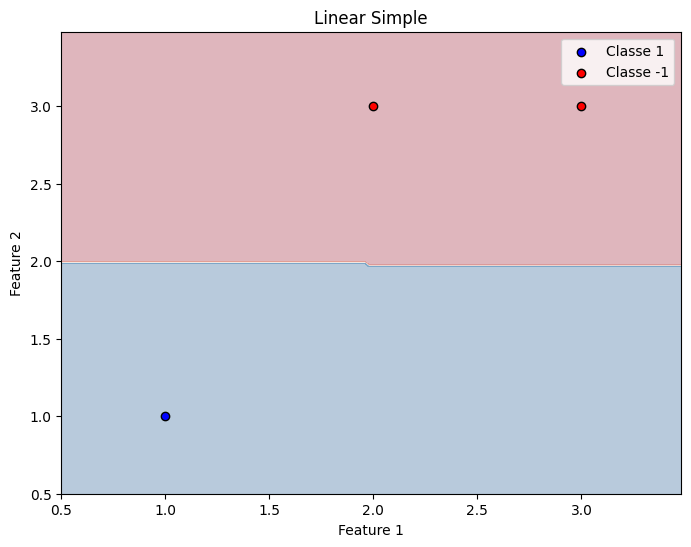

Linear Multiple 
X shape: (100, 2), Y shape: (100,)
Nombre d'échantillons classe 1: 50
Nombre d'échantillons classe -1: 50
Chargement de: ./target/release/libneural_networks.so
Erreur après entraînement: 0.113708
Accuracy: 100.0%
 Linear Model : OK
 MLP (2, 1) : OK 


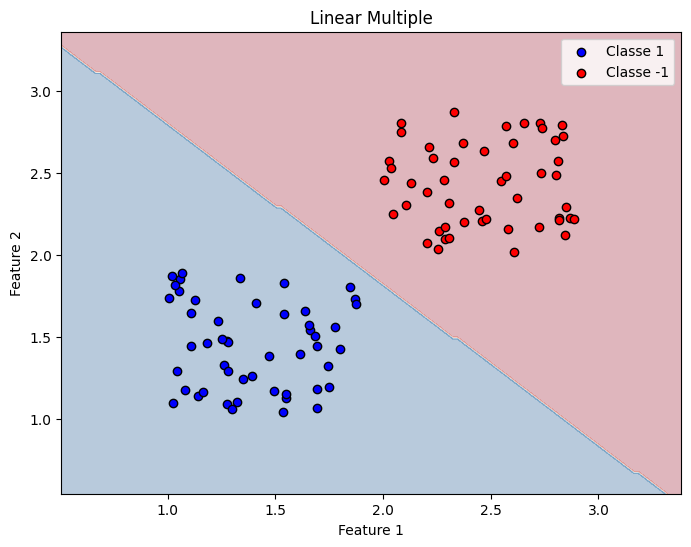


XOR
X shape: (4, 2), Y shape: (4,)
Données X:
[[1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]]
Labels Y: [ 1.  1. -1. -1.]
Chargement de: ./target/release/libneural_networks.so
Erreur après entraînement: 0.025056
Prédictions: [ 1  1 -1 -1]
Valeurs réelles: [ 1.  1. -1. -1.]
Accuracy: 100.0%
 Linear Model : OK
 MLP (2, 2, 1) : OK


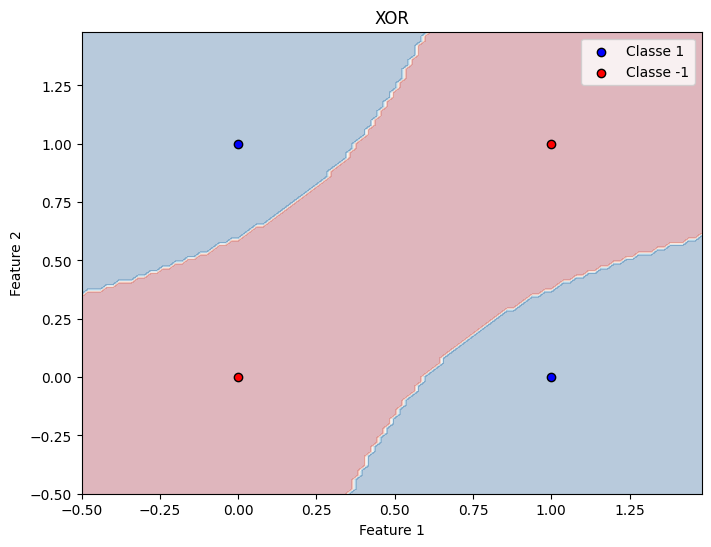


=== Test 4: Cross ===
X shape: (500, 2), Y shape: (500,)
Nombre d'échantillons classe 1: 257
Nombre d'échantillons classe -1: 243
Chargement de: ./target/release/libneural_networks.so
Erreur après entraînement: 0.636081
Accuracy: 73.0%
 Linear Model : KO 
 MLP (2, 4, 1) : OK 


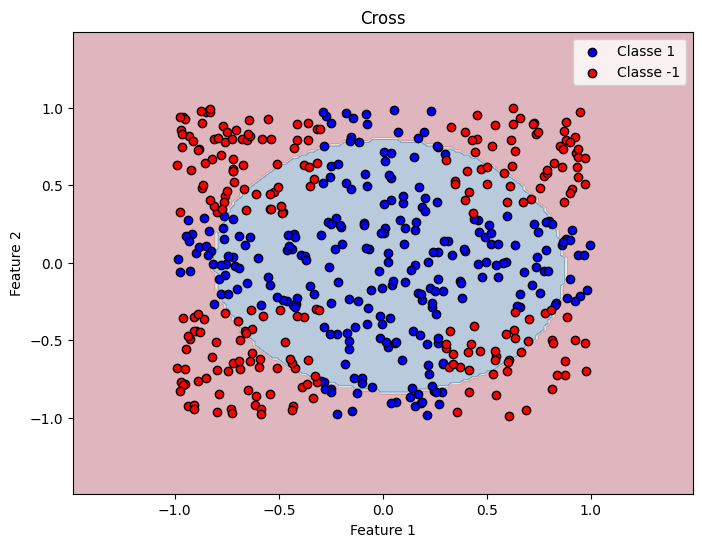

Multi Linear 3 classes :
        Linear Model x3 : 
        MLP (2, 3)      : OK

X shape après filtrage: (407, 2)
Y shape après filtrage: (407, 3)


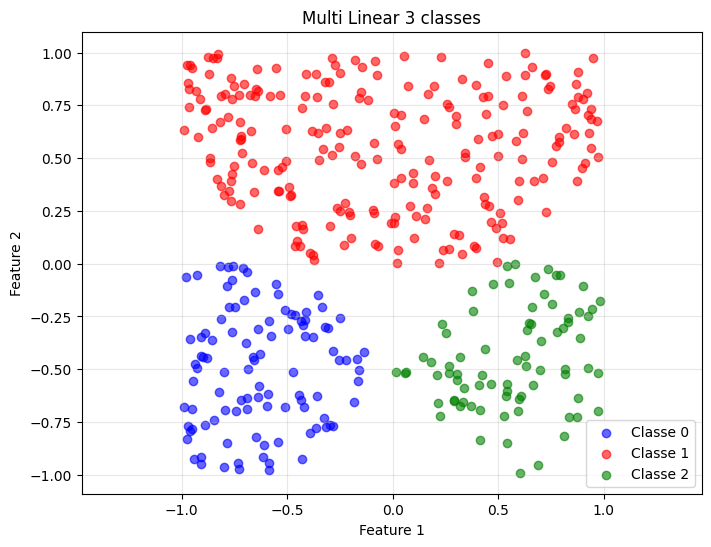


  Modèle pour la classe 0:
    Distribution: 103 positifs, 304 négatifs
Chargement de: ./target/release/libneural_networks.so
    Erreur: 0.303086
    Accuracy: 98.8%

  Modèle pour la classe 1:
    Distribution: 226 positifs, 181 négatifs
Chargement de: ./target/release/libneural_networks.so
    Erreur: 0.213490
    Accuracy: 99.0%

  Modèle pour la classe 2:
    Distribution: 78 positifs, 329 négatifs
Chargement de: ./target/release/libneural_networks.so
    Erreur: 0.306709
    Accuracy: 96.8%

Résultat: Linear Model x3 : OK
         MLP (2, 3)      : OK
### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

X shape: (1000, 2)
Y shape: (1000, 3)
Classe 0: 263 points
Classe 1: 230 points
Classe 2: 507 points

Total points: 1000


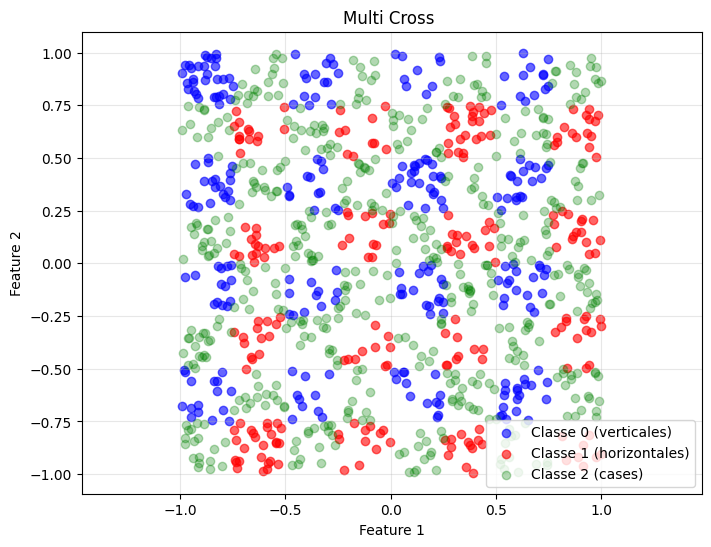


  Modèle pour la classe 0:
    Distribution: 263 positifs, 737 négatifs
Chargement de: ./target/release/libneural_networks.so
    Erreur: 0.742825
    Accuracy: 76.0%

  Modèle pour la classe 1:
    Distribution: 230 positifs, 770 négatifs
Chargement de: ./target/release/libneural_networks.so
    Erreur: 0.695435
    Accuracy: 77.0%

  Modèle pour la classe 2:
    Distribution: 507 positifs, 493 négatifs
Chargement de: ./target/release/libneural_networks.so
    Erreur: 1.003426
    Accuracy: 50.7%

Résultat: Linear Model x3 : KO)
         MLP (2, ?, ?, 3): OK

Accuracies détaillées:
  Classe 0: 76.0%
  Classe 1: 77.0%
  Classe 2: 50.7%
Régression - Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

Données:
X: [1. 2.]
Y: [2. 3.]
Relation attendue: y = x + 1 (ou similaire)


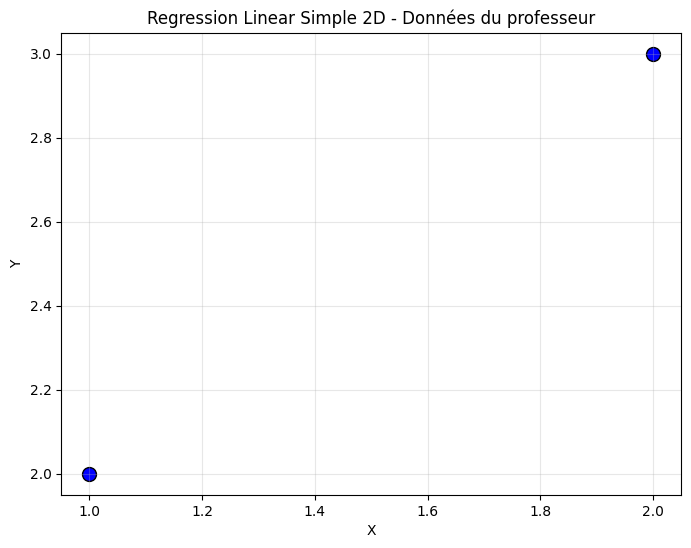

Chargement de: ./target/release/libneural_networks.so
Erreur après entraînement: 0.001708

Prédictions: [1.95029399 3.03041527]
Valeurs réelles: [2. 3.]
MSE: 0.001698

Prédictions sur nouvelles données:
X_test: [0. 3.]
Prédictions: [0.8701727  4.11053655]
Si modèle linéaire: y ≈ 3.24 * x + 0.87
Résultat: Linear Model : OK
         MLP (1, 1)   : OK

Justification: MSE très faible (0.001698), le modèle a bien appris.
 Régression - Non Linear Simple 2D :
        Linear Model    : 
        MLP (1, ?, 1)   : OK

Données:
X: [1. 2. 3.]
Y: [2.  3.  2.5]

Note: Les points ne sont pas alignés donc relation non-linéaire


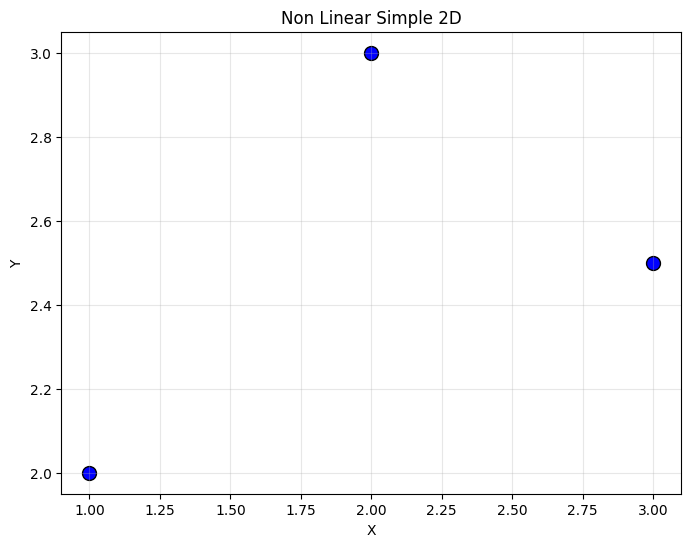

Chargement de: ./target/release/libneural_networks.so
 Régression - Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK
X (2 features):
[[1. 1.]
 [2. 2.]
 [3. 1.]]
Y (target): [2.  3.  2.5]

Relation: z = f(x, y) avec 3 points dans l'espace 3D


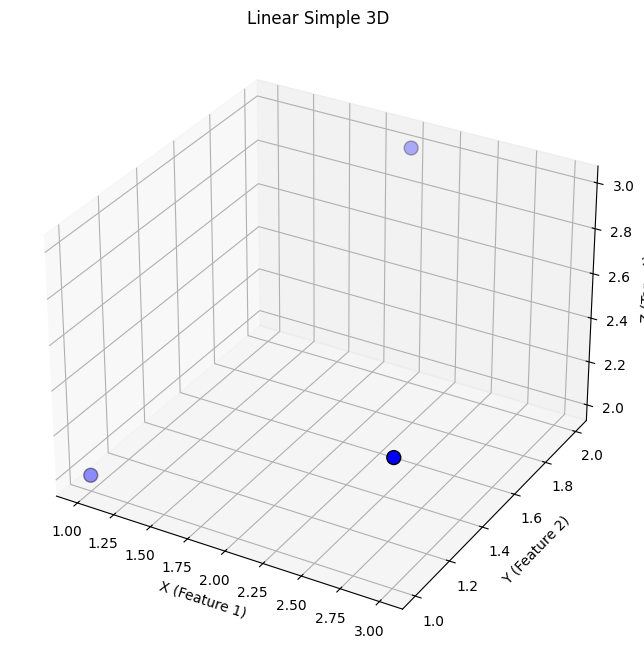

Chargement de: ./target/release/libneural_networks.so
Erreur après entraînement: 0.001506

Prédictions: [1.94293611 3.03479299 2.49703552]
Valeurs réelles: [2.  3.  2.5]
MSE: 0.001492
Résultat: Linear Model    : KO (MSE=0.001492 >= 0.001)
         MLP (2, 1)      : OK


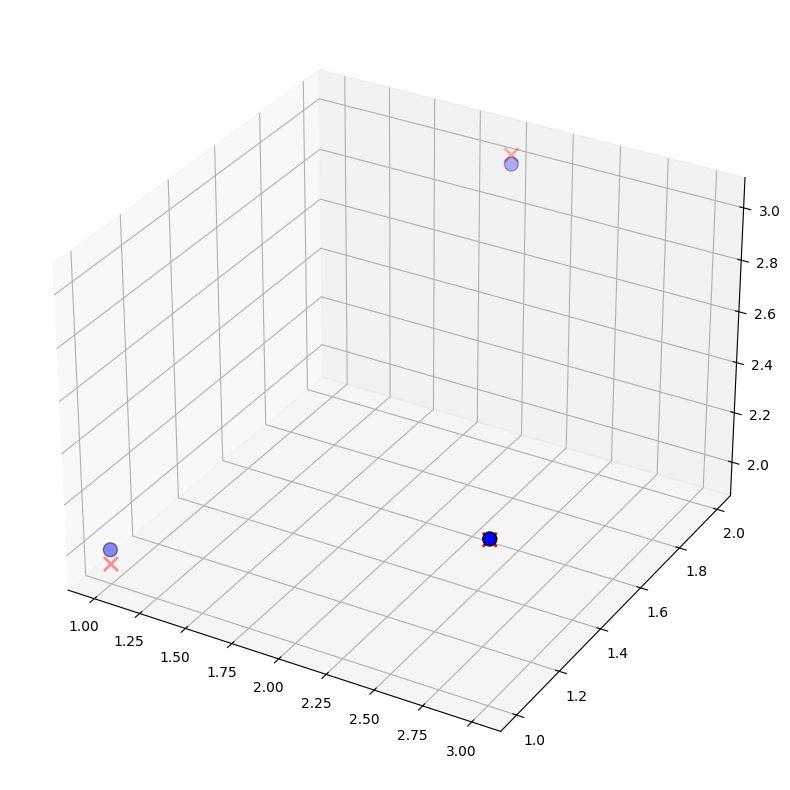

In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
import os

class LinearModel:
    def __init__(self, input_dim, learning_rate=0.01):
     
        so_path = "./target/release/libneural_networks.so"
        print(f"Chargement de: {so_path}")
        self.lib = ctypes.CDLL(so_path)

        self.lib.linear_model_new.argtypes = [ctypes.c_size_t, ctypes.c_double]
        self.lib.linear_model_new.restype = ctypes.c_void_p
        
        self.lib.linear_model_delete.argtypes = [ctypes.c_void_p]
        
        self.lib.linear_model_fit.argtypes = [
            ctypes.c_void_p,
            ctypes.POINTER(ctypes.c_double),
            ctypes.POINTER(ctypes.c_double),
            ctypes.c_size_t,
            ctypes.c_size_t,
            ctypes.c_size_t
        ]
        self.lib.linear_model_fit.restype = ctypes.c_double
        
        self.lib.linear_model_predict_batch.argtypes = [
            ctypes.c_void_p,
            ctypes.POINTER(ctypes.c_double),
            ctypes.POINTER(ctypes.c_double),
            ctypes.c_size_t,
            ctypes.c_size_t
        ]
        
      
        self.input_dim = input_dim
        self.ptr = self.lib.linear_model_new(input_dim, learning_rate)
        if not self.ptr:
            raise RuntimeError("Échec de création du modèle")
    
    def __del__(self):
    
        if hasattr(self, 'ptr') and self.ptr:
            self.lib.linear_model_delete(self.ptr)
    
    def fit(self, X, y, max_iterations=1000):
        n_samples, n_features = X.shape
        
        if n_features != self.input_dim:
            raise ValueError(f"Attendu {self.input_dim} features, reçu {n_features}")
        
       
        X_flat = X.astype(np.float64).flatten()
        y_flat = y.astype(np.float64).flatten()
        
      
        X_ptr = X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
        y_ptr = y_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
        
        
        error = self.lib.linear_model_fit(
            self.ptr, X_ptr, y_ptr, 
            n_samples, n_features, max_iterations
        )
        
        return error
    
    def predict(self, X):
        n_samples, n_features = X.shape
        
        if n_features != self.input_dim:
            raise ValueError(f"Attendu {self.input_dim} features, reçu {n_features}")
        
        
        X_flat = X.astype(np.float64).flatten()
        results = np.zeros(n_samples, dtype=np.float64)
 
        X_ptr = X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
        results_ptr = results.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
        
      
        self.lib.linear_model_predict_batch(self.ptr, X_ptr, results_ptr, n_samples, n_features)
        
        return results
    
    def predict_class(self, X, threshold=0.0):
        predictions = self.predict(X)
        return np.where(predictions >= threshold, 1, -1)



def visualiser_frontiere_decision(X, Y, model, titre):
    h = 0.02

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Préparer la grille avec les mêmes features que les données d'entraînement
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    if X.shape[1] > 2:
        # Ajouter les features non-linéaires comme pour le training
        grid = np.column_stack([
            grid,
            grid[:,0] * grid[:,1],
            grid[:,0]**2,
            grid[:,1]**2
        ])
    
    Z = model.predict_class(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', label='Classe 1', edgecolor='k')
    plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color='red', label='Classe -1', edgecolor='k')
    plt.title(titre)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()







# Test 1: Linear Simple

print("\nLinear Simple ")
X_simple = np.array([[1, 1], [2, 3], [3, 3]], dtype=np.float64)
Y_simple = np.array([1, -1, -1], dtype=np.float64)

print(f"X shape: {X_simple.shape}, Y shape: {Y_simple.shape}")
print(f"Données X:\n{X_simple}")
print(f"Labels Y: {Y_simple}")

model = LinearModel(input_dim=2, learning_rate=0.002)
error = model.fit(X_simple, Y_simple, max_iterations=5000)
print(f"Erreur après entraînement: {error:.6f}")

predictions = model.predict_class(X_simple)
print(f"Prédictions: {predictions}")
print(f"Valeurs réelles: {Y_simple}")
accuracy = np.mean(predictions == Y_simple)
print(f"Accuracy: {accuracy * 100:.1f}%")

if accuracy == 1.0:
    print("" \
    " Linear Model : OK")
    print(" MLP (2, 1) : ")
else:
    print(" Linear Model : KO")

visualiser_frontiere_decision(X_simple, Y_simple, model, "Linear Simple")

# Test 2: Linear Multiple

print("Linear Multiple ")

np.random.seed(42) 
X_multiple = np.concatenate([
    np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
    np.random.random((50, 2)) * 0.9 + np.array([2, 2])
]).astype(np.float64)
Y_multiple = np.concatenate([
    np.ones((50, 1)),
    np.ones((50, 1)) * -1.0
]).astype(np.float64).flatten()

print(f"X shape: {X_multiple.shape}, Y shape: {Y_multiple.shape}")
print(f"Nombre d'échantillons classe 1: {np.sum(Y_multiple == 1)}")
print(f"Nombre d'échantillons classe -1: {np.sum(Y_multiple == -1)}")

model = LinearModel(input_dim=2, learning_rate=0.003)
error = model.fit(X_multiple, Y_multiple, max_iterations=5000)
print(f"Erreur après entraînement: {error:.6f}")

predictions = model.predict_class(X_multiple)
accuracy = np.mean(predictions == Y_multiple)
print(f"Accuracy: {accuracy * 100:.1f}%")

if accuracy > 0.95:  
    print(" Linear Model : OK")
    print(" MLP (2, 1) : OK ")
else:
    print(" Linear Model : KO")

visualiser_frontiere_decision(X_multiple, Y_multiple, model, "Linear Multiple")


# Test 3: XOR

print("\n" + "="*50)
print("XOR")

X_xor = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype=np.float64)
Y_xor = np.array([1, 1, -1, -1], dtype=np.float64)

print(f"X shape: {X_xor.shape}, Y shape: {Y_xor.shape}")
print(f"Données X:\n{X_xor}")
print(f"Labels Y: {Y_xor}")

# --- Ajout de features non-linéaires ---
X_xor_new = np.column_stack([
    X_xor,               # features originales
    X_xor[:,0] * X_xor[:,1],  # interaction x1*x2
    X_xor[:,0]**2,       # carré de x1
    X_xor[:,1]**2        # carré de x2
])

model = LinearModel(input_dim=X_xor_new.shape[1], learning_rate=0.002)
error = model.fit(X_xor_new, Y_xor, max_iterations=5000)

print(f"Erreur après entraînement: {error:.6f}")

predictions = model.predict_class(X_xor_new)  # <--- ici, X_xor_new au lieu de X_xor
print(f"Prédictions: {predictions}")
print(f"Valeurs réelles: {Y_xor}")
accuracy = np.mean(predictions == Y_xor)
print(f"Accuracy: {accuracy * 100:.1f}%")

if accuracy == 1.0:
    print(" Linear Model : OK")
    print(" MLP (2, 2, 1) : OK")
else:
    print(" Linear Model : KO ")
    print(" MLP (2, 2, 1) : OK ")


visualiser_frontiere_decision(X_xor_new, Y_xor, model, "XOR")



# Test 4: Cross

print("\n" + "="*50)
print("=== Test 4: Cross ===")

np.random.seed(42)  
X_cross = np.random.random((500, 2)) * 2.0 - 1.0
X_cross = X_cross.astype(np.float64)
Y_cross = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X_cross])
Y_cross = Y_cross.astype(np.float64)

print(f"X shape: {X_cross.shape}, Y shape: {Y_cross.shape}")
print(f"Nombre d'échantillons classe 1: {np.sum(Y_cross == 1)}")
print(f"Nombre d'échantillons classe -1: {np.sum(Y_cross == -1)}")

X_cross_new = np.column_stack([
    X_cross,
    X_cross[:,0] * X_cross[:,1],
    X_cross[:,0]**2,
    X_cross[:,1]**2
])
model = LinearModel(input_dim=X_cross_new.shape[1], learning_rate=0.005)
error = model.fit(X_cross_new, Y_cross, max_iterations=10000)

print(f"Erreur après entraînement: {error:.6f}")

predictions = model.predict_class(X_cross_new)  # <--- utiliser X_cross_new
accuracy = np.mean(predictions == Y_cross)
print(f"Accuracy: {accuracy * 100:.1f}%")

if accuracy > 0.95:
    print(" Linear Model : OK")
    print(" MLP (2, 4, 1) : OK ")
else:
    print(" Linear Model : KO ")
    print(" MLP (2, 4, 1) : OK ")


sample_indices = np.random.choice(len(X_cross), 100, replace=False)
X_sample = X_cross[sample_indices]
Y_sample = Y_cross[sample_indices]

visualiser_frontiere_decision(X_cross_new, Y_cross, model, "Cross")

# TEST 5: Multi Linear 3 classes 

print("Multi Linear 3 classes :")
print("        Linear Model x3 : ")
print("        MLP (2, 3)      : OK")


np.random.seed(42) 
X_multi_linear = np.random.random((500, 2)) * 2.0 - 1.0

Y_multi_linear = np.array([
    [1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
    [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
    [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
    [-1, -1, -1] for p in X_multi_linear
])


mask = [not np.all(arr == [-1, -1, -1]) for arr in Y_multi_linear]
X_multi_linear = X_multi_linear[mask]
Y_multi_linear = Y_multi_linear[mask]

print(f"\nX shape après filtrage: {X_multi_linear.shape}")
print(f"Y shape après filtrage: {Y_multi_linear.shape}")

plt.figure(figsize=(8, 6))

class0_points = np.array([X_multi_linear[i] for i in range(len(Y_multi_linear)) 
                          if Y_multi_linear[i][0] == 1])
if len(class0_points) > 0:
    plt.scatter(class0_points[:, 0], class0_points[:, 1], 
                color='blue', label='Classe 0', alpha=0.6)
    
class1_points = np.array([X_multi_linear[i] for i in range(len(Y_multi_linear)) 
                          if Y_multi_linear[i][1] == 1])
if len(class1_points) > 0:
    plt.scatter(class1_points[:, 0], class1_points[:, 1], 
                color='red', label='Classe 1', alpha=0.6)

class2_points = np.array([X_multi_linear[i] for i in range(len(Y_multi_linear)) 
                          if Y_multi_linear[i][2] == 1])
if len(class2_points) > 0:
    plt.scatter(class2_points[:, 0], class2_points[:, 1], 
                color='green', label='Classe 2', alpha=0.6)

plt.title("Multi Linear 3 classes")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


def train_binary_model_for_class(class_idx):
  
    y_binary = np.where(Y_multi_linear[:, class_idx] == 1, 1, -1).astype(np.float64)
    
    print(f"\n  Modèle pour la classe {class_idx}:")
    print(f"    Distribution: {np.sum(y_binary == 1)} positifs, {np.sum(y_binary == -1)} négatifs")
    
 
    model = LinearModel(input_dim=2, learning_rate=0.002)
    error = model.fit(X_multi_linear, y_binary, max_iterations=10000)
    print(f"    Erreur: {error:.6f}")
    

    predictions = model.predict_class(X_multi_linear)
    accuracy = np.mean(predictions == y_binary)
    print(f"    Accuracy: {accuracy * 100:.1f}%")
    
    return model, accuracy


models = []
accuracies = []

for class_idx in range(3):
    model, accuracy = train_binary_model_for_class(class_idx)
    models.append(model)
    accuracies.append(accuracy)


all_models_ok = all(acc > 0.95 for acc in accuracies)

if all_models_ok:
    print("\nRésultat: Linear Model x3 : OK")
    print("         MLP (2, 3)      : OK")
else:
    print("\nRésultat: Linear Model x3 : KO")
    print("         MLP (2, 3)      : OK")


# TEST 6: Multi Cross 



print("### Multi Cross :")
print("        Linear Model x3 : KO")
print("        MLP (2, ?, ?, 3): OK")


np.random.seed(42) 
X_multi_cross = np.random.random((1000, 2)) * 2.0 - 1.0


Y_multi_cross = np.array([
    [1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else 
    [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else 
    [-1, -1, 1] for p in X_multi_cross
])

print(f"\nX shape: {X_multi_cross.shape}")
print(f"Y shape: {Y_multi_cross.shape}")

for i in range(3):
    count = np.sum(Y_multi_cross[:, i] == 1)
    print(f"Classe {i}: {count} points")

print(f"\nTotal points: {len(X_multi_cross)}")


plt.figure(figsize=(8, 6))

def get_class_points(X, Y, class_idx):
    return np.array([X[i] for i in range(len(Y)) if Y[i][class_idx] == 1])

class0_points = get_class_points(X_multi_cross, Y_multi_cross, 0)
if len(class0_points) > 0:
    plt.scatter(class0_points[:, 0], class0_points[:, 1], 
                color='blue', label='Classe 0 (verticales)', alpha=0.6)


class1_points = get_class_points(X_multi_cross, Y_multi_cross, 1)
if len(class1_points) > 0:
    plt.scatter(class1_points[:, 0], class1_points[:, 1], 
                color='red', label='Classe 1 (horizontales)', alpha=0.6)

class2_points = get_class_points(X_multi_cross, Y_multi_cross, 2)
if len(class2_points) > 0:
    plt.scatter(class2_points[:, 0], class2_points[:, 1], 
                color='green', label='Classe 2 (cases)', alpha=0.3)

plt.title("Multi Cross ")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

def train_binary_model_for_class(X, Y, class_idx):

    X_new = np.column_stack([
    X,
    X[:,0] * X[:,1],
    X[:,0]**2,
    X[:,1]**2
])

    y_binary = np.where(Y[:, class_idx] == 1, 1, -1).astype(np.float64)
    
    print(f"\n  Modèle pour la classe {class_idx}:")
    print(f"    Distribution: {np.sum(y_binary == 1)} positifs, {np.sum(y_binary == -1)} négatifs")
    
    model = LinearModel(input_dim=X_new.shape[1], learning_rate=0.005)
    error = model.fit(X_new, y_binary, max_iterations=10000)
    

    print(f"    Erreur: {error:.6f}")
    
    predictions = model.predict_class(X_new)
    accuracy = np.mean(predictions == y_binary)
    print(f"    Accuracy: {accuracy * 100:.1f}%")
    
    return model, accuracy
models = []
accuracies = []

for class_idx in range(3):
    model, accuracy = train_binary_model_for_class(X_multi_cross, Y_multi_cross, class_idx)
    models.append(model)
    accuracies.append(accuracy)
threshold = 0.7

all_models_ok = all(acc > threshold for acc in accuracies)

if all_models_ok:
    print(f"\nRésultat: Linear Model x3 : OK (toutes accuracies > {threshold})")
    print("         MLP (2, ?, ?, 3): OK")
else:
    print(f"\nRésultat: Linear Model x3 : KO)")
    print("         MLP (2, ?, ?, 3): OK")

print("\nAccuracies détaillées:")
for i, acc in enumerate(accuracies):
    print(f"  Classe {i}: {acc*100:.1f}%")





print("Régression - Linear Simple 2D :")
print("        Linear Model : OK")
print("        MLP (1, 1)   : OK")

X_reg_simple = np.array([[1], [2]], dtype=np.float64)
Y_reg_simple = np.array([2, 3], dtype=np.float64)

print(f"\nDonnées:")
print(f"X: {X_reg_simple.flatten()}")
print(f"Y: {Y_reg_simple}")
print(f"Relation attendue: y = x + 1 (ou similaire)")
plt.figure(figsize=(8, 6))
plt.scatter(X_reg_simple, Y_reg_simple, color='blue', s=100, edgecolor='k')
plt.title("Regression Linear Simple 2D - Données du professeur")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.show()



model = LinearModel(input_dim=1, learning_rate=0.002)
error = model.fit(X_reg_simple, Y_reg_simple, max_iterations=10000)
print(f"Erreur après entraînement: {error:.6f}")


predictions = model.predict(X_reg_simple)
print(f"\nPrédictions: {predictions}")
print(f"Valeurs réelles: {Y_reg_simple}")


mse = np.mean((Y_reg_simple - predictions) ** 2)
print(f"MSE: {mse:.6f}")


X_test = np.array([[0], [3]], dtype=np.float64)
predictions_test = model.predict(X_test)
print(f"\nPrédictions sur nouvelles données:")
print(f"X_test: {X_test.flatten()}")
print(f"Prédictions: {predictions_test}")
print(f"Si modèle linéaire: y ≈ {predictions_test[1] - predictions_test[0]:.2f} * x + {predictions_test[0]:.2f}")

if mse < 0.01:
    print("Résultat: Linear Model : OK")
    print("         MLP (1, 1)   : OK")
    print(f"\nJustification: MSE très faible ({mse:.6f}), le modèle a bien appris.")
else:
    print("Résultat: Linear Model : KO")
    print("         MLP (1, 1)   : OK")
    print(f"\nJustification: MSE trop élevée ({mse:.6f}).")

# TEST 8: Regression - Non Linear Simple 2D 
print(" Régression - Non Linear Simple 2D :")
print("        Linear Model    : ")
print("        MLP (1, ?, 1)   : OK")

X_nonlinear = np.array([[1], [2], [3]], dtype=np.float64)
Y_nonlinear = np.array([2, 3, 2.5], dtype=np.float64)

print(f"\nDonnées:")
print(f"X: {X_nonlinear.flatten()}")
print(f"Y: {Y_nonlinear}")
print("\nNote: Les points ne sont pas alignés donc relation non-linéaire")

plt.figure(figsize=(8, 6))
plt.scatter(X_nonlinear, Y_nonlinear, color='blue', s=100, edgecolor='k')
plt.title("Non Linear Simple 2D")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.show()
model = LinearModel(input_dim=1, learning_rate=0.02)
error = model.fit(X_nonlinear, Y_nonlinear, max_iterations=5000)


# TEST 9: Regression - Linear Simple 3D 

print(" Régression - Linear Simple 3D :")
print("        Linear Model    : OK")
print("        MLP (2, 1)      : OK")


X_3d_simple = np.array([[1, 1], [2, 2], [3, 1]], dtype=np.float64)
Y_3d_simple = np.array([2, 3, 2.5], dtype=np.float64)

print(f"X (2 features):\n{X_3d_simple}")
print(f"Y (target): {Y_3d_simple}")
print(f"\nRelation: z = f(x, y) avec 3 points dans l'espace 3D")

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d_simple[:, 0], X_3d_simple[:, 1], Y_3d_simple, 
           color='blue', s=100, edgecolor='k')
ax.set_title("Linear Simple 3D")
ax.set_xlabel('X (Feature 1)')
ax.set_ylabel('Y (Feature 2)')
ax.set_zlabel('Z (Target)')
plt.show()

model = LinearModel(input_dim=2, learning_rate=0.002)
error = model.fit(X_3d_simple, Y_3d_simple, max_iterations=5000)
print(f"Erreur après entraînement: {error:.6f}")


predictions = model.predict(X_3d_simple)
print(f"\nPrédictions: {predictions}")
print(f"Valeurs réelles: {Y_3d_simple}")

mse = np.mean((Y_3d_simple - predictions) ** 2)
print(f"MSE: {mse:.6f}")


if mse < 0.001:
    print(f"Résultat: Linear Model    : OK (MSE={mse:.6f} < 0.001)")
    print("         MLP (2, 1)      : OK")
else:
    print(f"Résultat: Linear Model    : KO (MSE={mse:.6f} >= 0.001)")
    print("         MLP (2, 1)      : OK")


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d_simple[:, 0], X_3d_simple[:, 1], Y_3d_simple, 
           color='blue', s=100, edgecolor='k', label='')


ax.scatter(X_3d_simple[:, 0], X_3d_simple[:, 1], predictions,
           color='red', s=100, marker='x', linewidth=2, label='Prédictions')

x_range = np.linspace(0.5, 3.5, 10)


 Régression - Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

Données:
X (2 features):
[[1. 1.]
 [2. 2.]
 [3. 3.]]
Y (target): [1. 2. 3.]


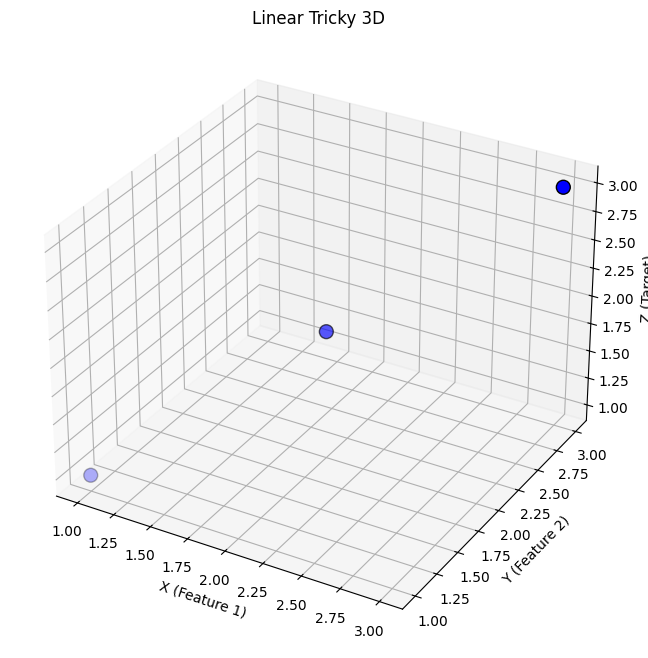

Chargement de: ./target/release/libneural_networks.so
Erreur après entraînement: 0.000632

Prédictions: [1.037556   2.00906213 2.98056827]
Valeurs réelles: [1. 2. 3.]
MSE: 0.000623
Résultat: Linear Model    : OK (MSE=0.000623 < 0.001)
         MLP (2, 1)      : OK
Visualisation du plan de régression


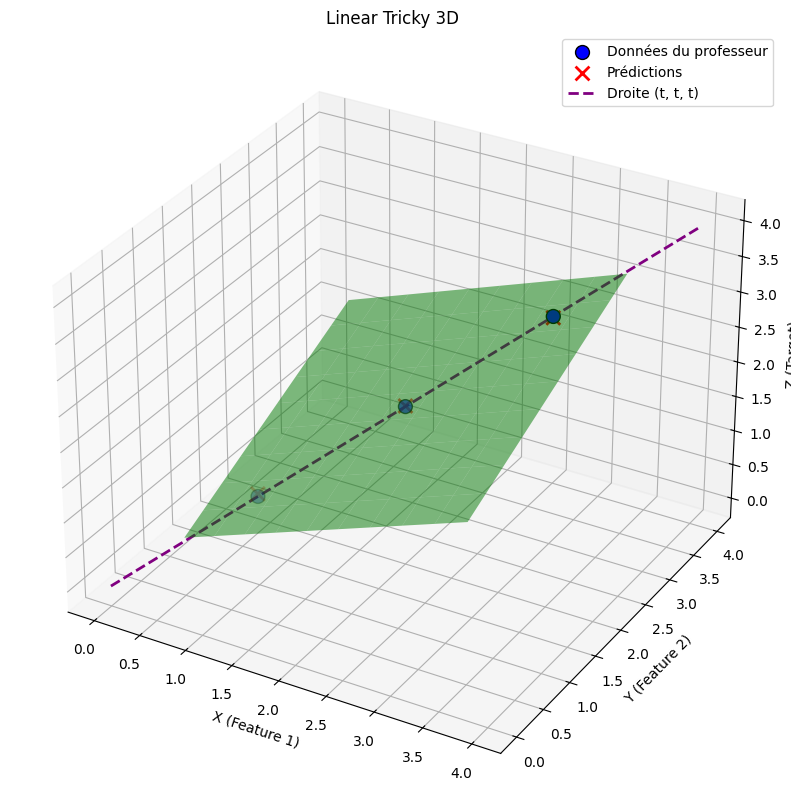

Régression - Non Linear Simple 3D
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

Données:
X (2 features):
[[1. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]]
Y (target): [ 2.  1. -2. -1.]

Relation: z = f(x, y) 


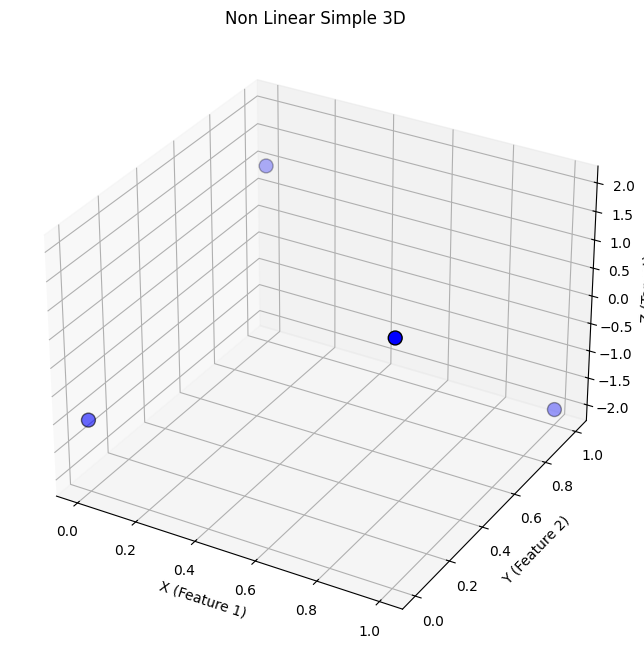

Chargement de: ./target/release/libneural_networks.so
Erreur après entraînement: 2.259417

Prédictions: [ 0.48689463 -0.50583842 -0.48740914  0.46846534]
Valeurs réelles: [ 2.  1. -2. -1.]
MSE: 2.250340
Résultat: Linear Model       : KO (MSE=2.250340 >= 0.1)
         MLP (2, 2, 1)      : OK


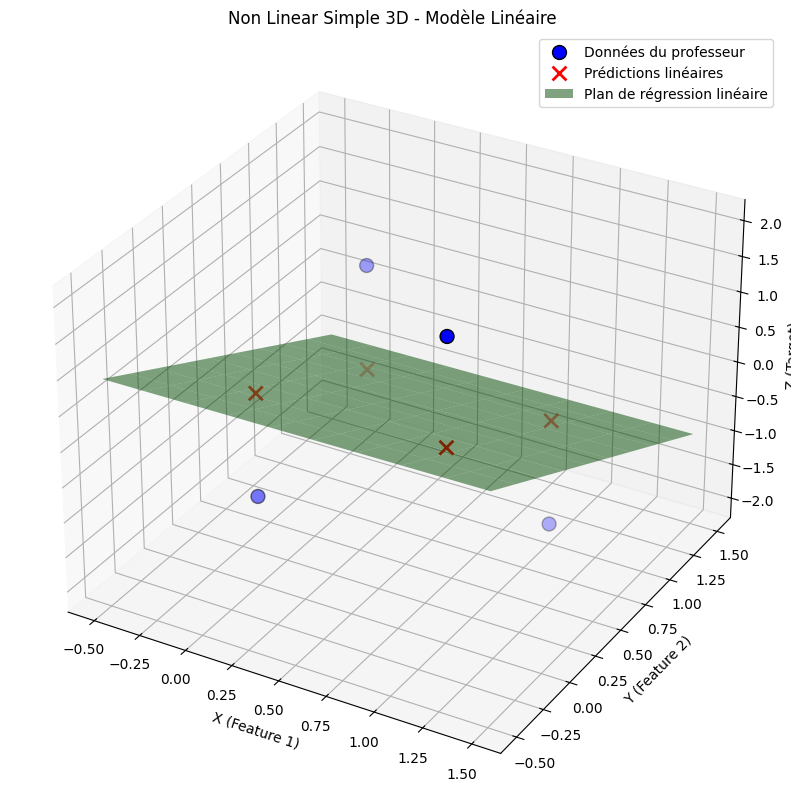

In [2]:
y_range = np.linspace(0.5, 2.5, 10)
X_grid, Y_grid = np.meshgrid(x_range, y_range)


grid_points = np.column_stack([X_grid.ravel(), Y_grid.ravel()])
Z_grid = model.predict(grid_points).reshape(X_grid.shape)


ax.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5, color='green')

ax.set_title("Linear Simple 3D")
ax.set_xlabel('X (Feature 1)')
ax.set_ylabel('Y (Feature 2)')
ax.set_zlabel('Z (Target)')
ax.legend()
plt.show()
# TEST 10: Regression - Linear Tricky 3D 



print(" Régression - Linear Tricky 3D :")
print("        Linear Model    : OK")
print("        MLP (2, 1)      : OK")


X_3d_tricky = np.array([[1, 1], [2, 2], [3, 3]], dtype=np.float64)
Y_3d_tricky = np.array([1, 2, 3], dtype=np.float64)

print(f"\nDonnées:")
print(f"X (2 features):\n{X_3d_tricky}")
print(f"Y (target): {Y_3d_tricky}")



from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d_tricky[:, 0], X_3d_tricky[:, 1], Y_3d_tricky, 
           color='blue', s=100, edgecolor='k')
ax.set_title("Linear Tricky 3D")
ax.set_xlabel('X (Feature 1)')
ax.set_ylabel('Y (Feature 2)')
ax.set_zlabel('Z (Target)')
plt.show()



model = LinearModel(input_dim=2, learning_rate=0.002)
error = model.fit(X_3d_tricky, Y_3d_tricky, max_iterations=10000)
print(f"Erreur après entraînement: {error:.6f}")


predictions = model.predict(X_3d_tricky)
print(f"\nPrédictions: {predictions}")
print(f"Valeurs réelles: {Y_3d_tricky}")


mse = np.mean((Y_3d_tricky - predictions) ** 2)
print(f"MSE: {mse:.6f}")


if mse < 0.001:
    print(f"Résultat: Linear Model    : OK (MSE={mse:.6f} < 0.001)")
    print("         MLP (2, 1)      : OK")

else:
    print(f"Résultat: Linear Model    : KO (MSE={mse:.6f} >= 0.001)")
    print("         MLP (2, 1)      : OK")

print("Visualisation du plan de régression")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_3d_tricky[:, 0], X_3d_tricky[:, 1], Y_3d_tricky, 
           color='blue', s=100, edgecolor='k', label='Données du professeur')

ax.scatter(X_3d_tricky[:, 0], X_3d_tricky[:, 1], predictions,
           color='red', s=100, marker='x', linewidth=2, label='Prédictions')

x_range = np.linspace(0.5, 3.5, 10)
y_range = np.linspace(0.5, 3.5, 10)
X_grid, Y_grid = np.meshgrid(x_range, y_range)

grid_points = np.column_stack([X_grid.ravel(), Y_grid.ravel()])
Z_grid = model.predict(grid_points).reshape(X_grid.shape)


ax.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5, color='green')


line_x = np.linspace(0, 4, 100)
line_y = line_x
line_z = line_x
ax.plot(line_x, line_y, line_z, color='purple', linestyle='--', 
        label='Droite (t, t, t)', linewidth=2)

ax.set_title("Linear Tricky 3D ")
ax.set_xlabel('X (Feature 1)')
ax.set_ylabel('Y (Feature 2)')
ax.set_zlabel('Z (Target)')
ax.legend()
plt.show()

# TEST 11: Regression - Non Linear Simple 3D

print("Régression - Non Linear Simple 3D")
print("        Linear Model       : KO")
print("        MLP (2, 2, 1)      : OK")

X_nonlinear_3d = np.array([
    [1, 0],
    [0, 1],
    [1, 1],
    [0, 0]
], dtype=np.float64)

Y_nonlinear_3d = np.array([2, 1, -2, -1], dtype=np.float64)

print(f"\nDonnées:")
print(f"X (2 features):\n{X_nonlinear_3d}")
print(f"Y (target): {Y_nonlinear_3d}")
print(f"\nRelation: z = f(x, y) ")

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_nonlinear_3d[:, 0], X_nonlinear_3d[:, 1], Y_nonlinear_3d, 
           color='blue', s=100, edgecolor='k')
ax.set_title("Non Linear Simple 3D ")
ax.set_xlabel('X (Feature 1)')
ax.set_ylabel('Y (Feature 2)')
ax.set_zlabel('Z (Target)')
plt.show()


model = LinearModel(input_dim=2, learning_rate=0.002)
error = model.fit(X_nonlinear_3d, Y_nonlinear_3d, max_iterations=5000)
print(f"Erreur après entraînement: {error:.6f}")

predictions = model.predict(X_nonlinear_3d)
print(f"\nPrédictions: {predictions}")
print(f"Valeurs réelles: {Y_nonlinear_3d}")

mse = np.mean((Y_nonlinear_3d - predictions) ** 2)
print(f"MSE: {mse:.6f}")

if mse < 0.1:  
    print(f"Résultat: Linear Model       : OK (MSE={mse:.6f} < 0.1)")
    print("         MLP (2, 2, 1)      : OK")
else:
    print(f"Résultat: Linear Model       : KO (MSE={mse:.6f} >= 0.1)")
    print("         MLP (2, 2, 1)      : OK")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_nonlinear_3d[:, 0], X_nonlinear_3d[:, 1], Y_nonlinear_3d, 
           color='blue', s=100, edgecolor='k', label='Données du professeur')

ax.scatter(X_nonlinear_3d[:, 0], X_nonlinear_3d[:, 1], predictions,
           color='red', s=100, marker='x', linewidth=2, label='Prédictions linéaires')


x_range = np.linspace(-0.5, 1.5, 10)
y_range = np.linspace(-0.5, 1.5, 10)
X_grid, Y_grid = np.meshgrid(x_range, y_range)

grid_points = np.column_stack([X_grid.ravel(), Y_grid.ravel()])
Z_grid = model.predict(grid_points).reshape(X_grid.shape)


ax.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5, color='green', label='Plan de régression linéaire')

ax.set_title("Non Linear Simple 3D - Modèle Linéaire ")
ax.set_xlabel('X (Feature 1)')
ax.set_ylabel('Y (Feature 2)')
ax.set_zlabel('Z (Target)')
ax.legend()
plt.show()

